# Breast Cancer Wisconsin

In [1]:
import pandas as pd
import zipfile
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import make_scorer

In [4]:
# Unzipping the file
with zipfile.ZipFile('Breast Cancer Wisconsin.zip', 'r') as zip_ref:
    zip_ref.extractall('Breast_Cancer_Wisconsin')

# Get list of all files in the extracted folder
file_list = os.listdir('Breast_Cancer_Wisconsin')

# Load the CSV file into a DataFrame
csv_file = [file for file in file_list if file.endswith('.csv')][0]
df = pd.read_csv(f'Breast_Cancer_Wisconsin/{csv_file}')

# Display the first few rows to inspect the data
print(df.head())

# Check the basic information of the dataset
print("\nData Types and Non-Null Counts:\n")
print(df.info())
print(df.describe())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
# Preprocessing

# Print out the column names to check for any discrepancies
print("\nColumn Names in the dataset:")
print(df.columns)

# Drop the 'ID' and 'Unnamed: 32' columns as they are not useful for prediction
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')  # errors='ignore' will not raise an error if the column is not found

# Check the columns again after dropping
print("\nColumns after dropping 'ID' and 'Unnamed: 32':")
print(df.columns)

# Convert 'diagnosis' column to binary values (M = malignant, B = benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split the data into features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)  # Features (all columns except 'diagnosis')
y = df['diagnosis']  # Target variable (diagnosis)

# Check the cleaned data
print("\nCleaned data:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Column Names in the dataset:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Columns after dropping 'ID' and 'Unnamed: 32':
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'per

C:\Users\milto\AppData\Local\Temp\ipykernel_4576\3413228466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')  # 'diagnosis' (not 'Diagnosis')


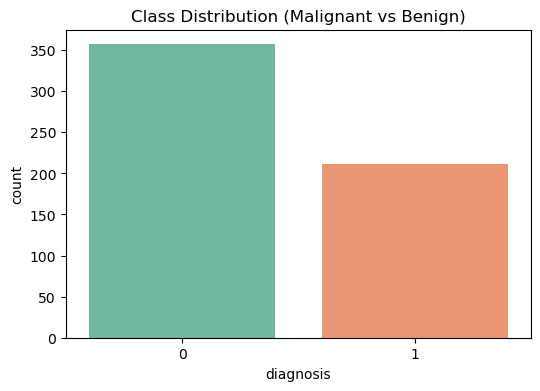

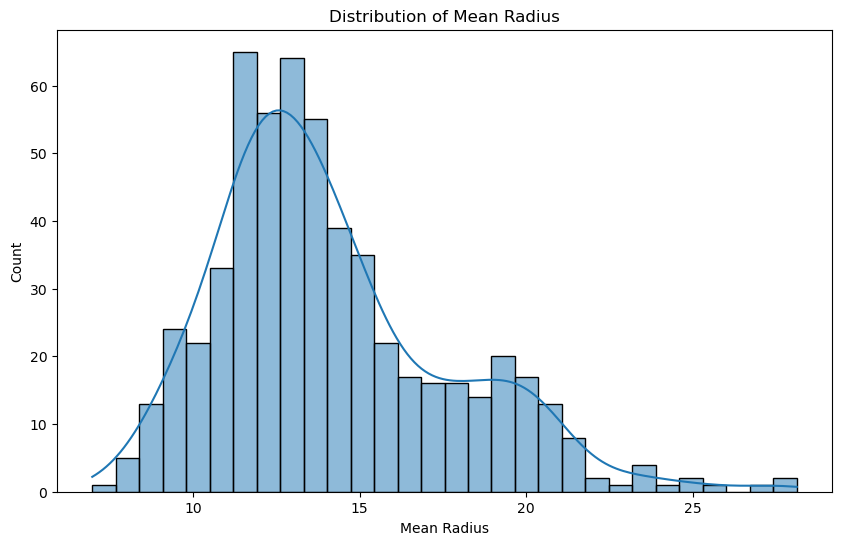

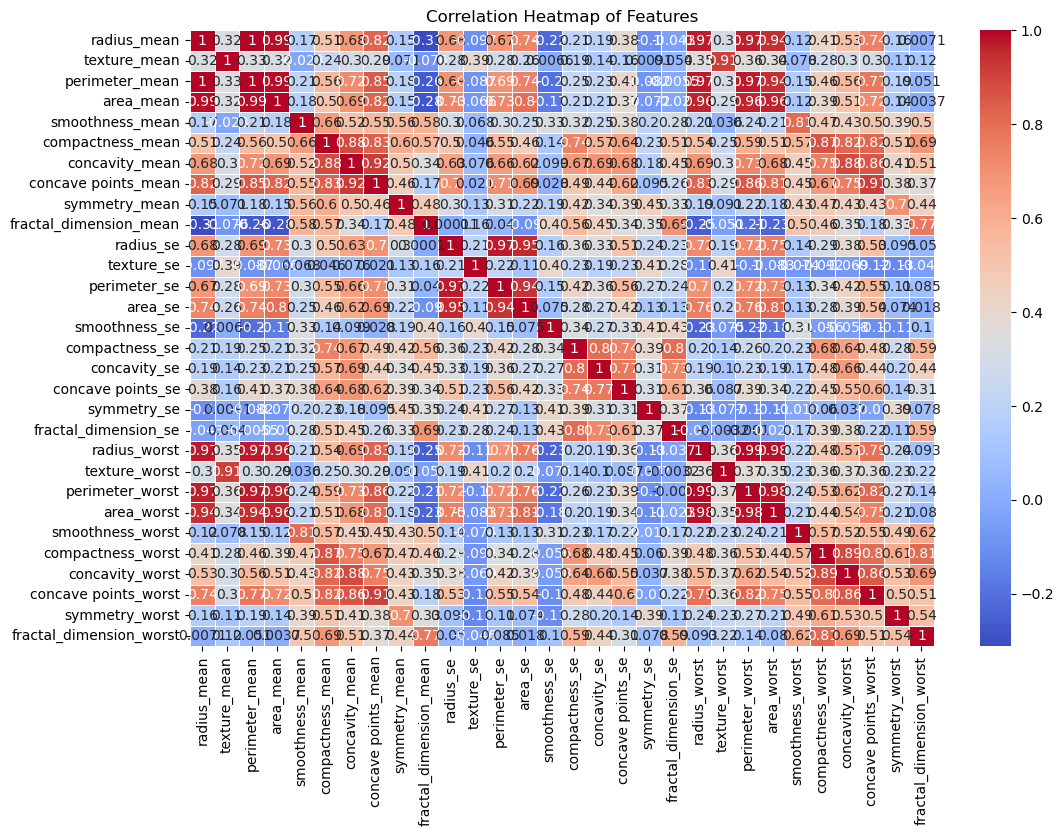

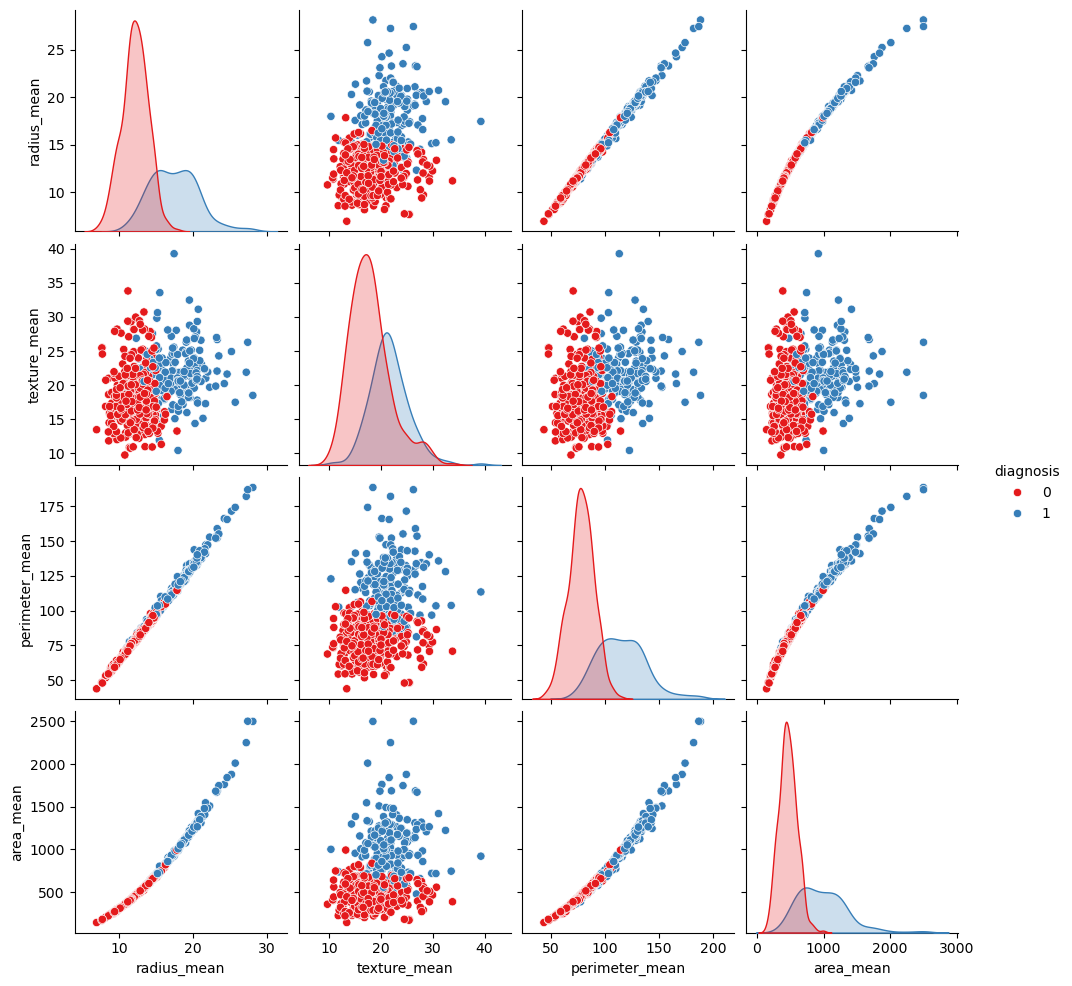

In [6]:
# Exploratory Data Analysis (EDA)

# Class distribution (Benign vs Malignant)
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='Set2')  # 'diagnosis' (not 'Diagnosis')
plt.title('Class Distribution (Malignant vs Benign)')
plt.show()

# Distribution of individual features (e.g., Mean Radius)
plt.figure(figsize=(10, 6))
sns.histplot(df['radius_mean'], kde=True, bins=30)  # Use 'radius_mean' (not 'Radius_mean')
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.show()

# Correlation heatmap to see relationships between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns='diagnosis').corr()  # Drop 'diagnosis' column before correlation calculation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis', palette='Set1')
plt.show()


Logistic Regression Performance:
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM Performance:
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Random Forest Performance:
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy    

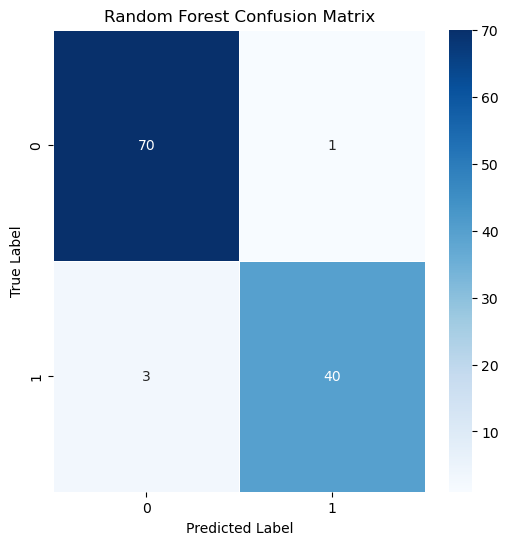

In [7]:
# Split the data into features (X) and target (y)
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']  # Target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("\nSVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print(f"\nCross-validation scores for Random Forest: {cv_scores_rf}")
print(f"Mean CV score: {cv_scores_rf.mean()}")

# Hyperparameter Tuning with GridSearchCV (for Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"\nBest Parameters from GridSearchCV: {rf_grid_search.best_params_}")

# Best Random Forest model after hyperparameter tuning
best_rf_model = rf_grid_search.best_estimator_

# Predictions and evaluation for the best model
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nBest Random Forest Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(classification_report(y_test, y_pred_best_rf))


Cross-validation scores for Random Forest: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV score: 0.9560937742586555


In [ ]:
# Model Saving

# Save the trained model for future use
joblib.dump(rf_model, 'breast_cancer_rf_model.pkl')
print("\nRandom Forest Model saved successfully!")